In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import hotspot
from statsmodels.stats import weightstats as stests
import mplscience
from matplotlib import rcParams
import statsmodels.api as sm
import statsmodels.formula.api as ols

Global seed set to 0
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pynndescent/utils.py:202: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pynndescent/utils.py:302: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(


In [2]:
adata = scvi.data.read_h5ad("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/NEWonlymRNA_scVI_evo1234exp_g20230729_FINAL.h5ad")
#model = scvi.model.SCVI.load('NEWonlymRNA_model_scVI_evo1234exp_g20230729_FINAL', adata)

In [7]:
# generate psseudobulk expression dataframe
X = adata.raw.X                  # raw counts matrix
genes = adata.var_names      # genes in raw
samples = adata.obs['cluster'].astype(str).to_numpy()
uniq = pd.unique(samples)

rows = []
for s in uniq:
    mask = samples == s
    Xs = X[mask]
    rows.append(np.asarray(Xs.sum(axis=0)).ravel())

sum_df = pd.DataFrame(rows, index=uniq, columns=genes) 
sum_df

dnaA     dnaN  SAUSA300_RS00020    recF     gyrB     gyrA   nnrD   hutH  \
L  13218.0  13748.0             967.0  8933.0  28122.0  34351.0  875.0  500.0   
S    272.0    248.0              19.0   217.0    443.0    485.0  167.0   46.0   
M   1821.0   1915.0             121.0  1235.0   4231.0   5133.0  145.0   61.0   

     serS  SAUSA300_RS00055  ...  SAUSA300_RS15580  SAUSA300_RS15635  \
L  7402.0             257.0  ...              35.0              93.0   
S   121.0              12.0  ...              18.0              28.0   
M  1222.0              30.0  ...              11.0              24.0   

   SAUSA300_RS15665  SAUSA300_RS15725  SAUSA300_RS15735  SAUSA300_RS15740  \
L              37.0              73.0              86.0              57.0   
S               3.0               4.0               2.0               0.0   
M               4.0               5.0               8.0               9.0   

   SAUSA300_RS15795  SAUSA300_RS15885  SAUSA300_RS15905  SAUSA300_RS15910  
L             320.0               1.0             247.0              28.0  
S              26.0              35.0               2.0               0.0  
M              64.0               1.0              29.0               4.0  

[3 rows x 2566 columns]

In [8]:
sum_df.to_csv("evo1234r_cluster_sum.csv")

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


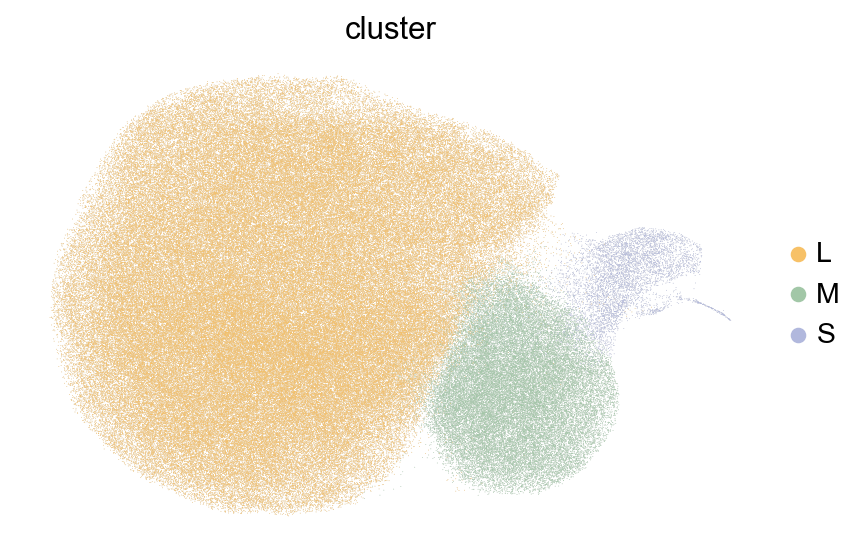

In [90]:
sc.set_figure_params(figsize=(6, 4))

# Create a new figure and axis
fig, ax = plt.subplots()

# First, plot the general UMAP without showing it (show=False)
sc.pl.umap(adata, show=False, ax=ax)

# Then, plot the UMAP for the subset of data with custom colors on the same axis
sc.pl.umap(adata,
           color="cluster",
           palette=['#F7C167', '#A2C7A7', '#B1B8DD'],           
           ax=ax,
           frameon=False,
          save="cluster.pdf")

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
Trying to set attribute `.uns` of view, copying.


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


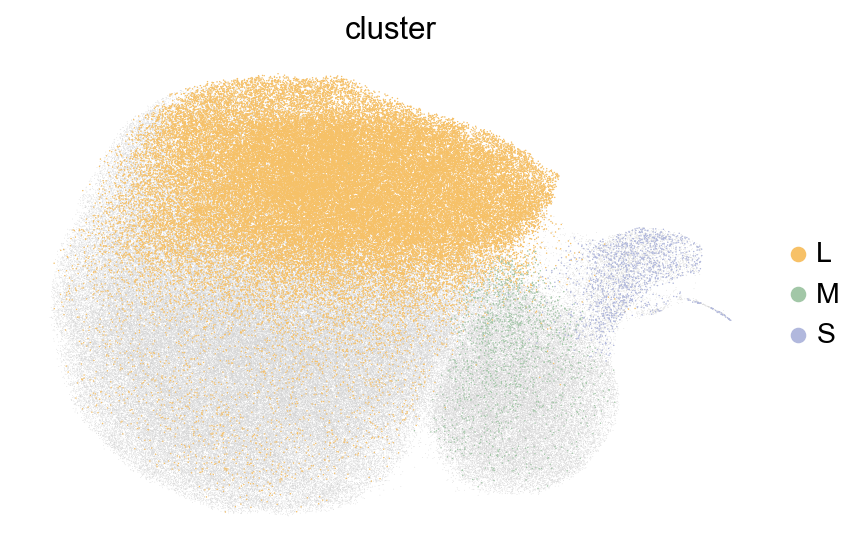

In [56]:
sc.set_figure_params(figsize=(6, 4))

# Create a new figure and axis
fig, ax = plt.subplots()

# First, plot the general UMAP without showing it (show=False)
sc.pl.umap(adata, show=False, ax=ax)

# Then, plot the UMAP for the subset of data with custom colors on the same axis
sc.pl.umap(adata[adata.obs['sample'] == '1r'],
           color="cluster",
           palette=['#F7C167', '#A2C7A7', '#B1B8DD'],           
           ax=ax,
           frameon=False,
          save="1r.pdf")

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
Trying to set attribute `.uns` of view, copying.


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


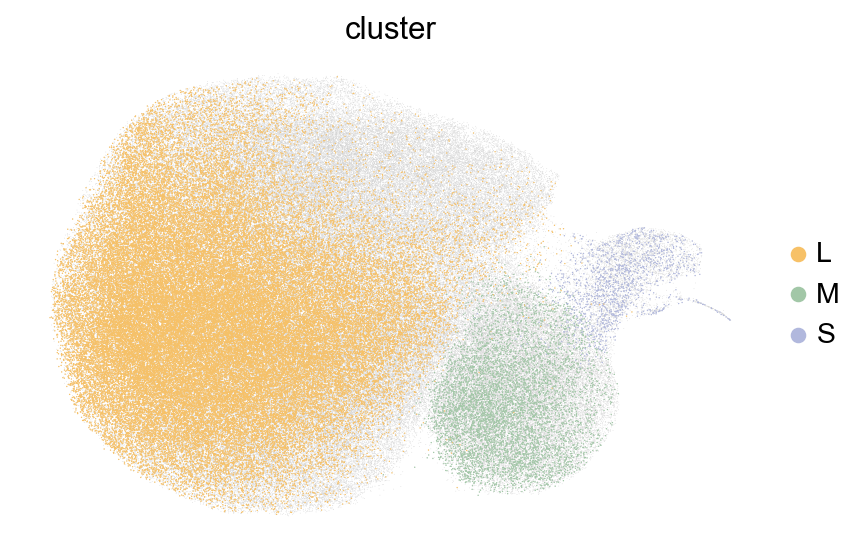

In [57]:
sc.set_figure_params(figsize=(6, 4))

# Create a new figure and axis
fig, ax = plt.subplots()

# First, plot the general UMAP without showing it (show=False)
sc.pl.umap(adata, show=False, ax=ax)

# Then, plot the UMAP for the subset of data with custom colors on the same axis
sc.pl.umap(adata[adata.obs['sample'] == '2r'],
           color="cluster",
           palette=['#F7C167', '#A2C7A7', '#B1B8DD'],           
           ax=ax,
           frameon=False,
          save="2r.pdf")

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
Trying to set attribute `.uns` of view, copying.


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


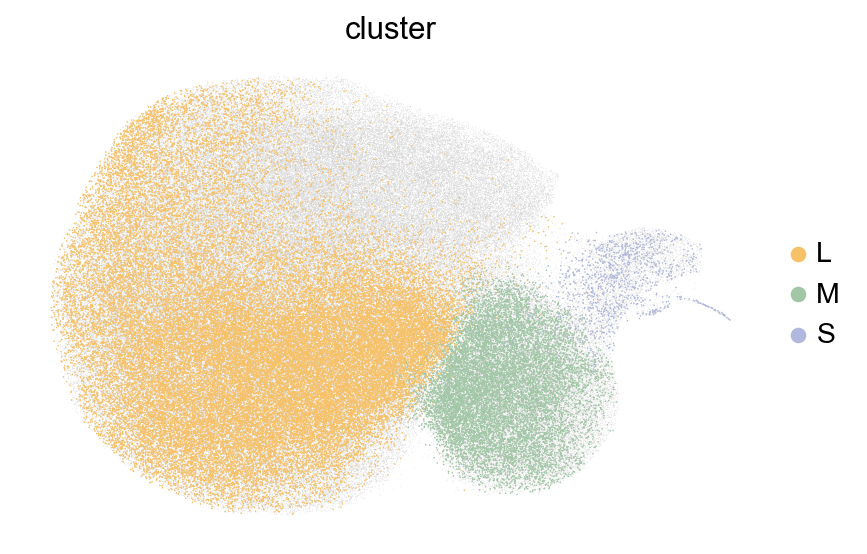

In [58]:
sc.set_figure_params(figsize=(6, 4))

# Create a new figure and axis
fig, ax = plt.subplots()

# First, plot the general UMAP without showing it (show=False)
sc.pl.umap(adata, show=False, ax=ax)

# Then, plot the UMAP for the subset of data with custom colors on the same axis
sc.pl.umap(adata[adata.obs['sample'] == '3r'],
           color="cluster",
           palette=['#F7C167', '#A2C7A7', '#B1B8DD'],           
           ax=ax,
           frameon=False,
          save="3r.pdf")

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
Trying to set attribute `.uns` of view, copying.


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


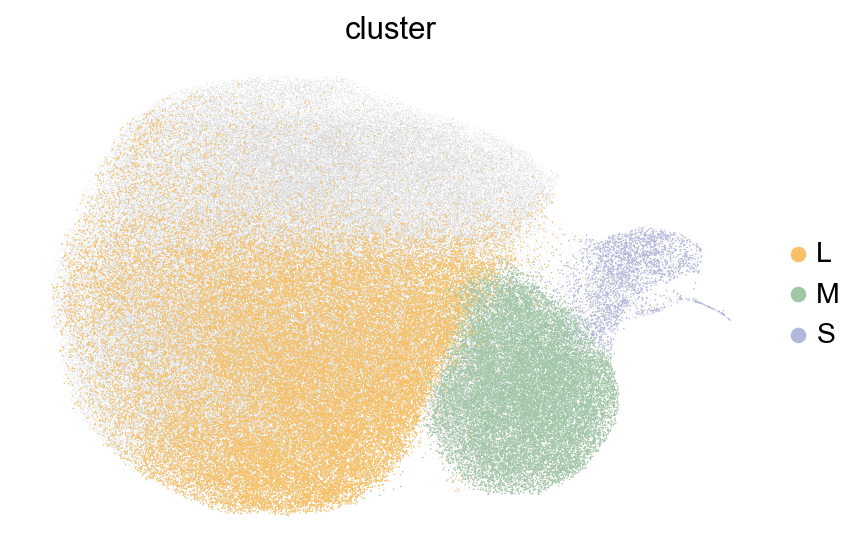

In [59]:
sc.set_figure_params(figsize=(6, 4))

# Create a new figure and axis
fig, ax = plt.subplots()

# First, plot the general UMAP without showing it (show=False)
sc.pl.umap(adata, show=False, ax=ax)

# Then, plot the UMAP for the subset of data with custom colors on the same axis
sc.pl.umap(adata[adata.obs['sample'] == '4r'],
           color="cluster",
           palette=['#F7C167', '#A2C7A7', '#B1B8DD'],           
           ax=ax,
           frameon=False,
          save="4r.pdf")

In [62]:
de_df = model.differential_expression(
    groupby="cluster"
)
de_df

DE...: 100%|████████████████████████████████████████| 3/3 [00:23<00:00,  7.97s/it]


proba_de  proba_not_de  bayes_factor    scale1    scale2  \
carB                0.9982        0.0018      6.318161  0.015988  0.000314   
carA                0.9974        0.0026      5.949637  0.004356  0.000098   
pyrC                0.9966        0.0034      5.680571  0.005846  0.000130   
pyrF                0.9960        0.0040      5.517450  0.002861  0.000154   
pyrE                0.9942        0.0058      5.144079  0.002020  0.000145   
...                    ...           ...           ...       ...       ...   
dnaI                0.5798        0.4202      0.321952  0.000237  0.000206   
rpsO                0.5732        0.4268      0.294919  0.000487  0.000555   
dnaB                0.5692        0.4308      0.278588  0.000216  0.000218   
SAUSA300_RS15340    0.5684        0.4316      0.275326  0.002985  0.002925   
ahpF                0.4814        0.5186     -0.074434  0.001897  0.001935   

                  pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  \
carB                       0.0   0.25  9.790318    8.690792  5.976477  ...   
carA                       0.0   0.25  8.627954    7.785875  5.036580  ...   
pyrC                       0.0   0.25  8.996662    8.003569  5.411166  ...   
pyrF                       0.0   0.25  6.085432    5.453368  3.633425  ...   
pyrE                       0.0   0.25  4.960444    4.528107  2.791695  ...   
...                        ...    ...       ...         ...       ...  ...   
dnaI                       0.0   0.25  0.144392    0.234140  0.982963  ...   
rpsO                       0.0   0.25 -0.302546   -0.147717  1.398129  ...   
dnaB                       0.0   0.25 -0.099376    0.004259  1.189404  ...   
SAUSA300_RS15340           0.0   0.25 -0.050347    0.030318  0.999799  ...   
ahpF                       0.0   0.25 -0.078396   -0.022712  0.777969  ...   

                  raw_mean1  raw_mean2  non_zeros_proportion1  \
carB               1.574563   0.014576               0.710722   
carA               0.426126   0.003868               0.320322   
pyrC               0.562120   0.005129               0.393522   
pyrF               0.267062   0.004638               0.222014   
pyrE               0.197895   0.006390               0.171278   
...                     ...        ...                    ...   
dnaI               0.017541   0.019389               0.017210   
rpsO               0.042198   0.054744               0.041039   
dnaB               0.021347   0.022816               0.020023   
SAUSA300_RS15340   0.277677   0.289996               0.229522   
ahpF               0.188483   0.194318               0.152739   

                  non_zeros_proportion2  raw_normalized_mean1  \
carB                           0.008485            166.454071   
carA                           0.003013             45.077267   
pyrC                           0.003526             59.870651   
pyrF                           0.004189             27.859735   
pyrE                           0.005941             20.609896   
...                                 ...                   ...   
dnaI                           0.018833              1.756207   
rpsO                           0.052334              4.577479   
dnaB                           0.022153              2.454431   
SAUSA300_RS15340               0.241413             35.465721   
ahpF                           0.167070             23.244709   

                  raw_normalized_mean2  is_de_fdr_0.05  comparison  group1  \
carB                          0.991195            True   L vs Rest       L   
carA                          0.280713            True   L vs Rest       L   
pyrC                          0.328459            True   L vs Rest       L   
pyrF                          0.332727            True   L vs Rest       L   
pyrE                          0.477442            True   L vs Rest       L   
...                                ...             ...         ...     ...   
dnaI                          1.9937

In [75]:
markers = {}
cats = adata.obs['cluster'].cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2.1]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.05]

    markers[c] = cell_type_df.index.tolist()[:10]
    
markers

{'L': ['carB',
  'carA',
  'pyrC',
  'pyrF',
  'pyrE',
  'pyrB',
  'pyrP',
  'pflB',
  'nasD',
  'narG'],
 'M': ['ssaA', 'sle1', 'isaA', 'pbuX', 'SAUSA300_RS11810'],
 'S': ['smpB',
  'fnbA',
  'est',
  'rnr',
  'sdrM',
  'cydA',
  'recD2',
  'lmrS',
  'ausA',
  'SAUSA300_RS12440']}

In [76]:
# Determine the minimum number of cells in any cluster
min_cells_per_cluster = adata.obs['cluster'].value_counts().min()

# Downsample each cluster to have the same number of cells
indices_to_keep = []

for cluster in adata.obs['cluster'].unique():
    cluster_indices = adata.obs[adata.obs['cluster'] == cluster].index
    sampled_indices = np.random.choice(cluster_indices, min_cells_per_cluster, replace=False)
    indices_to_keep.extend(sampled_indices)

# Create a new AnnData object with the downsampled cells
adata_downsampled = adata[indices_to_keep, :].copy()

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


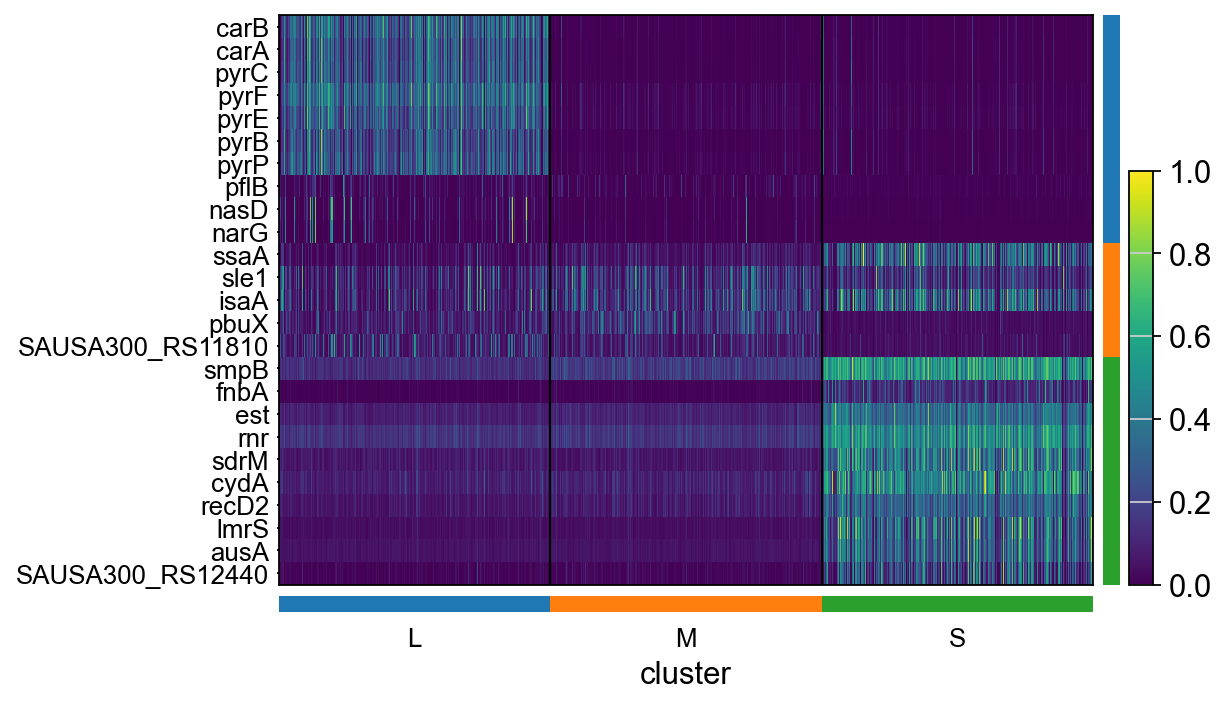

In [79]:
# Plot the heatmap with the downsampled data
sc.pl.heatmap(
    adata_downsampled,
    markers,
    groupby='cluster',
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=False,
    figsize=(7, 5),
    swap_axes=True, 
    save="cluster_gene_markers_equal_cells.pdf"
)

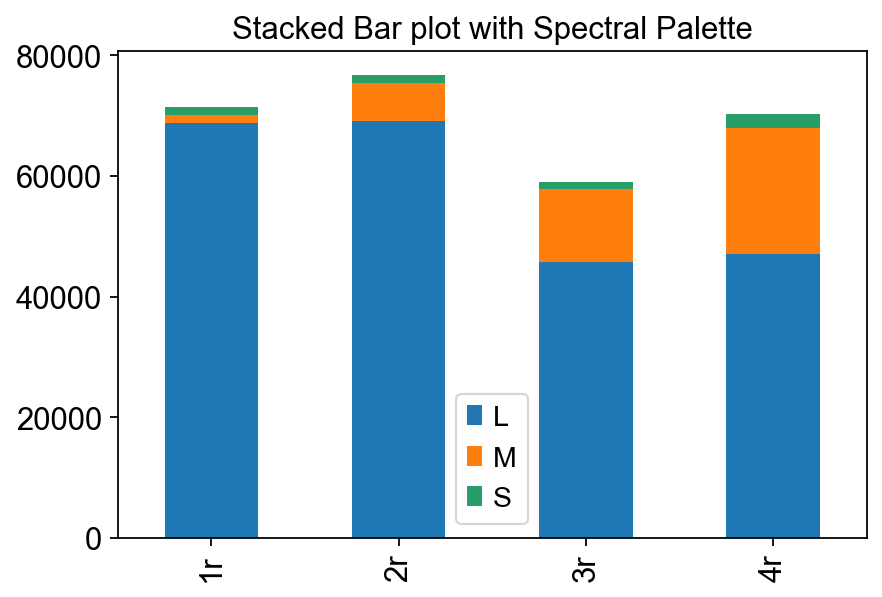

In [8]:
sample0 = adata.obs.loc[adata.obs['sample']=='1r', :]['cluster'].value_counts()
sample1 = adata.obs.loc[adata.obs['sample']=='2r', :]['cluster'].value_counts()
sample2 = adata.obs.loc[adata.obs['sample']=='3r', :]['cluster'].value_counts()
sample3 = adata.obs.loc[adata.obs['sample']=='4r', :]['cluster'].value_counts()
df_plot = pd.DataFrame([sample0,sample1, sample2,sample3])
df_plot.index=['1r','2r','3r','4r']
df_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot with Spectral Palette');

<Figure size 320x336 with 0 Axes>

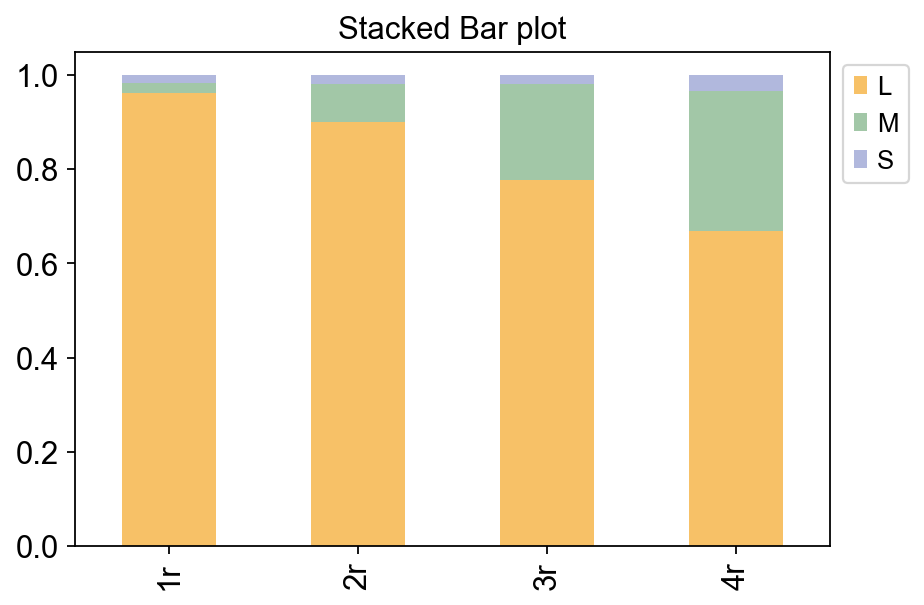

In [89]:
plt.figure(figsize=(4,4.2))
ax = df_plot.div(df_plot.sum(axis=1),axis=0).plot(
    kind='bar',stacked=True, 
    color=['#F7C167', '#A2C7A7', '#B1B8DD'], 
    title='Stacked Bar plot')
# Remove gridlines
ax.grid(False)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize="small")
plt.tight_layout()
plt.savefig("stacked_cluster_final.pdf")

In [4]:
df_proportion = df_plot.div(df_plot.sum(axis=1),axis=0)*100
df_proportion['Index'] = range(1, len(df_proportion) + 1)
df_proportion

L          M         S  Index
1r  96.256355   1.994370  1.749275      1
2r  89.976308   8.227238  1.796454      2
3r  77.637875  20.526048  1.836077      3
4r  66.935576  29.746457  3.317967      4

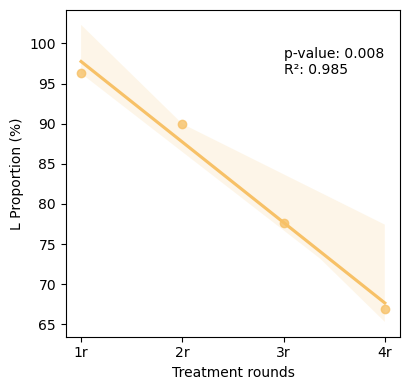

In [50]:
# Fit the regression model
factor='L'
formula = f"{factor} ~ Index"
model = ols.ols(formula, data=df_proportion).fit()
p_value = model.pvalues['Index']
r_squared = model.rsquared

# Plot
plt.figure(figsize=(4.2,4))
sns.regplot(x="Index", y=factor, data=df_proportion, color='#F7C167')
plt.xlabel('Treatment rounds')
plt.ylabel(f'{factor} Proportion (%)')
# Customize x-axis ticks and labels
plt.xticks(ticks=df_proportion['Index'], labels=df_proportion.index)

# Add annotations
plt.text(
    x=3, 
    y=max(df_proportion[factor]) - 0.05, 
    s=f"p-value: {p_value:.3f}\nR²: {r_squared:.3f}",
    fontsize=10, 
    #bbox=dict(facecolor='white', alpha=0.5)
)
plt.tight_layout()
plt.savefig("Lregression.pdf")
plt.show()

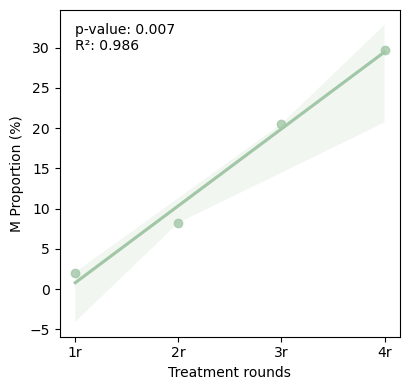

In [58]:
# Fit the regression model
factor='M'
formula = f"{factor} ~ Index"
model = ols.ols(formula, data=df_proportion).fit()
p_value = model.pvalues['Index']
r_squared = model.rsquared

# Plot
plt.figure(figsize=(4.2,4))
sns.regplot(x="Index", y=factor, data=df_proportion, color='#A2C7A7',ci=95)
plt.xlabel('Treatment rounds')
plt.ylabel(f'{factor} Proportion (%)')
# Customize x-axis ticks and labels
plt.xticks(ticks=df_proportion['Index'], labels=df_proportion.index)

# Add annotations
plt.text(
    x=1, 
    y=max(df_proportion[factor]) - 0.05, 
    s=f"p-value: {p_value:.3f}\nR²: {r_squared:.3f}",
    fontsize=10, 
    #bbox=dict(facecolor='white', alpha=0.5)
)
plt.tight_layout()
plt.savefig("Mregression.pdf")
plt.show()

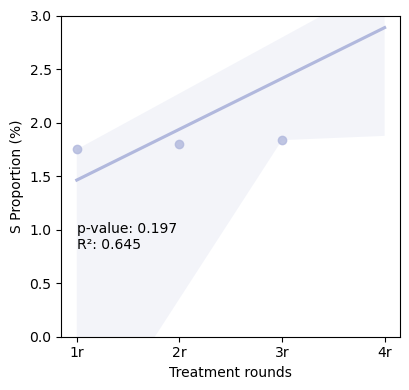

In [57]:
# Fit the regression model
factor='S'
formula = f"{factor} ~ Index"
model = ols.ols(formula, data=df_proportion).fit()
p_value = model.pvalues['Index']
r_squared = model.rsquared

# Plot
plt.figure(figsize=(4.2,4))
sns.regplot(x="Index", y=factor, data=df_proportion, color='#B1B8DD', ci=95)
plt.xlabel('Treatment rounds')
plt.ylabel(f'{factor} Proportion (%)')
plt.ylim(0,3)
# Customize x-axis ticks and labels
plt.xticks(ticks=df_proportion['Index'], labels=df_proportion.index)


# Add annotations
plt.text(
    x=1, 
    y=max(df_proportion[factor]) -2.5, 
    s=f"p-value: {p_value:.3f}\nR²: {r_squared:.3f}",
    fontsize=10, 
    #bbox=dict(facecolor='white', alpha=0.5)
)
plt.tight_layout()
plt.savefig("Sregression.pdf")
plt.show()

In [10]:
df_plot.div(df_plot.sum(axis=1),axis=0).to_csv("cluster_proportion.csv")

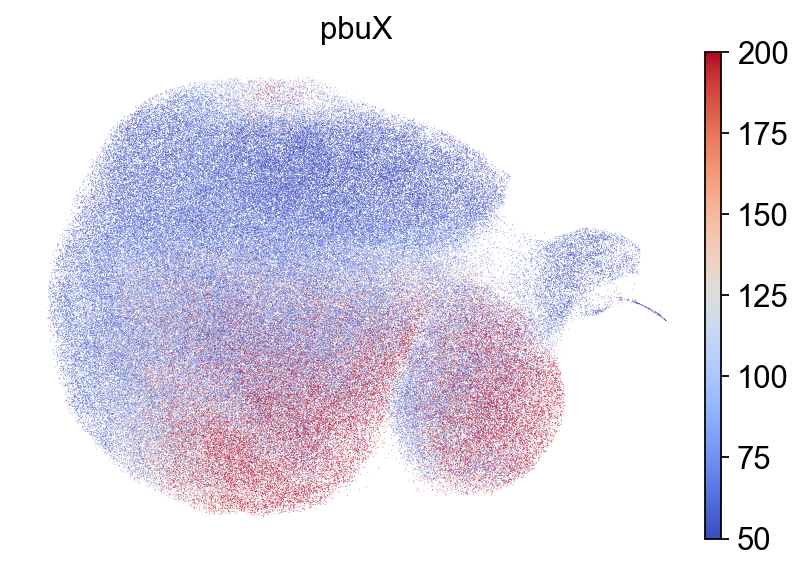

In [47]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(
    adata,
    color=["pbuX"],
    frameon=False,
    layer="scvi_normalized",
    cmap="coolwarm",
    vmax=200,
    vcenter=125,
    vmin=50,
    save="pbuX.pdf"
)

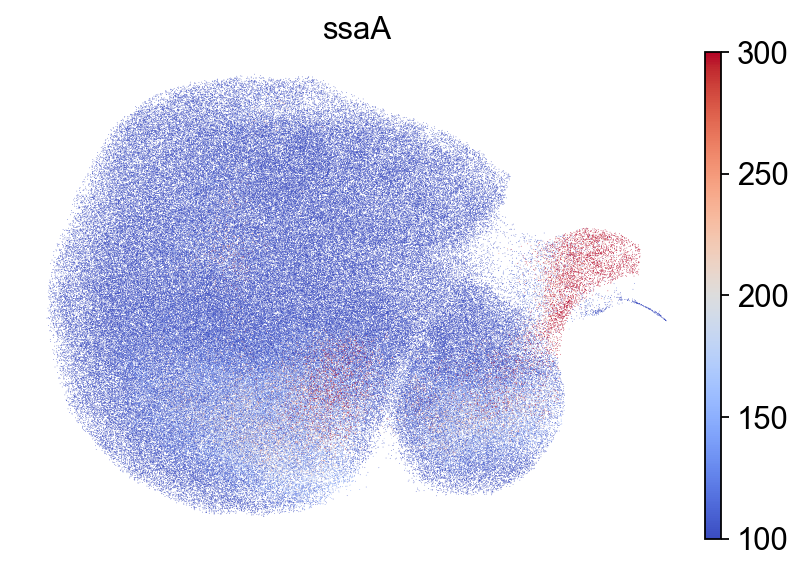

In [20]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(
    adata,
    color=["ssaA"],
    frameon=False,
    layer="scvi_normalized",
    cmap="coolwarm",
    vmax=300,
    vcenter=200,
    vmin=100,
    save="ssaA.pdf"
)

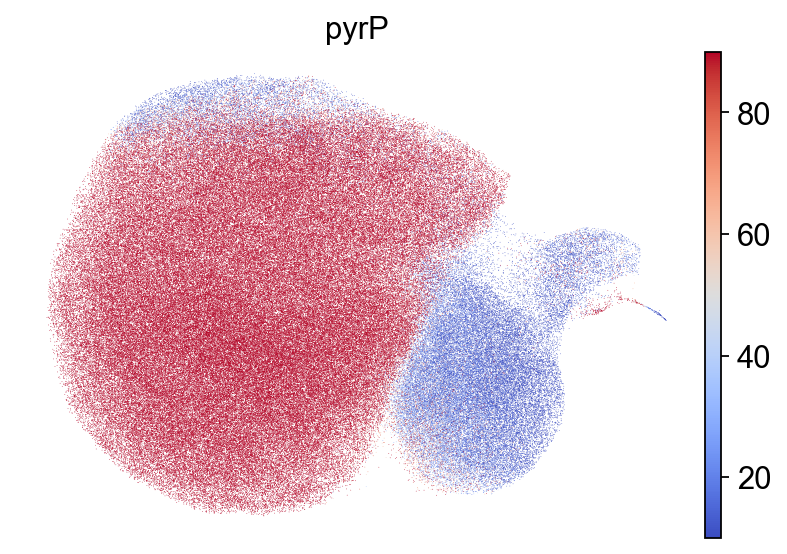

In [32]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(
    adata,
    color=["pyrP"],
    frameon=False,
    layer="scvi_normalized",
    cmap="coolwarm",
    vmax=90,
    vcenter=50,
    vmin=10,
    save="pyrP.pdf"
)